In [1]:
from queryClass.fetchSalesGraph_QueryHandling import FetchSalesGraphQueryHandling
from queryClass.browse_QueryHandling import BrowseQueryHandling

import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


In [2]:
sizes = ['8', '8.5', '9', '9.5', '10', '10.5', '11']

## Nike Air force 1 

In [3]:
searches = ["nike air force 1 low white 07","Nike Air Force 1 LowTravis Scott Sail", 
            "Nike Air Force 1 Low '07 White (Travis Scott Cactus Jack Utopia Edition)",
            "nike air force 1 low supreme box logo white","Nike Air Force 1 Low SP AMBUSH Black",
            "Nike Air Force 1 Low Tiffany & Co. 1837" ]

In [4]:
shoes = []

for search in searches:
    browse = BrowseQueryHandling()
    browse.setSearch(search, 1 , gender = "men", years = [''], sortID = "deadstock_sold")

    """ get the main info from the browse query in panda dataframe """
    df = browse.getInfo_DF()

    shoes.append(df.loc[0])

    """ get the sales graph from the browse query """
    df.to_csv('./INFO_BROWSER/' + shoes[-1]['URL Key'] + '.csv')

    print(shoes[-1]['URL Key'].replace("-", " ") + ' : sold ' +  str(shoes[-1]['sold']) +', retail price ' + str(shoes[-1]['retail Price']) +', release date ' + str(shoes[-1]['release Date']) +', average price ' + str(shoes[-1]['average price']))



nike air force 1 low white 07 : sold 66237, retail price 115, release date 2020-12-09, average price 98
nike air force 1 low travis scott sail : sold 116, retail price 150, release date 2018-08-10, average price 1112
nike air force 1 low 07 white travis scott cactus jack utopia edition : sold 5955, retail price 150, release date 2023-07-28, average price 154
nike air force 1 low supreme box logo white : sold 24045, retail price 118, release date 2020-03-05, average price 157
nike air force 1 low sp ambush black : sold 7946, retail price 190, release date 2023-02-28, average price 213
nike air force 1 low sp tiffany and co : sold 7577, retail price 400, release date 2023-03-07, average price 1157


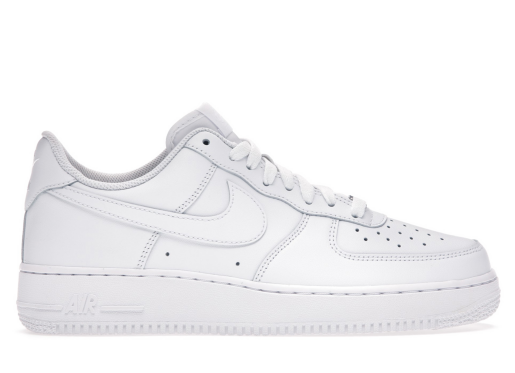

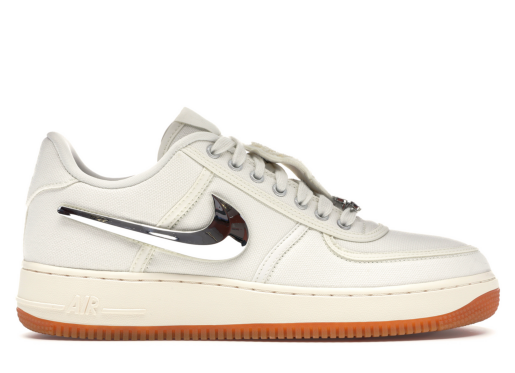

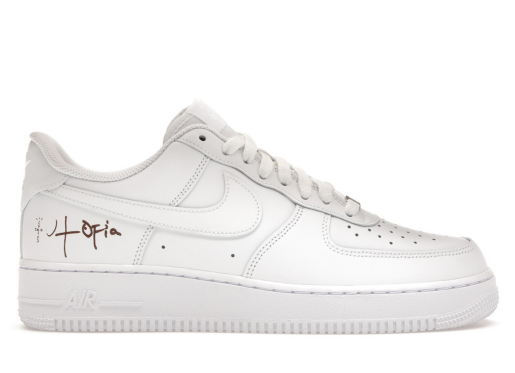

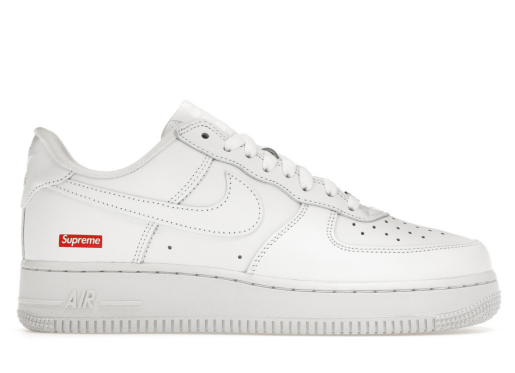

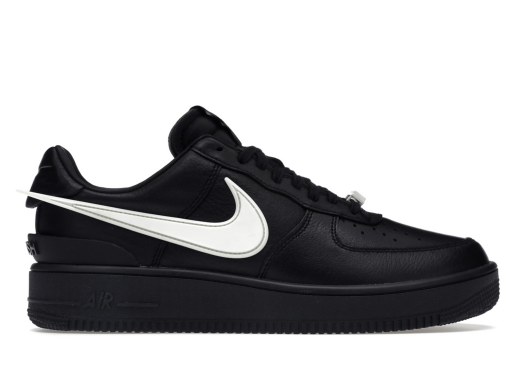

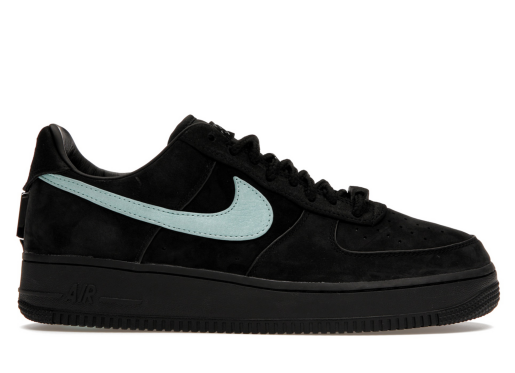

In [8]:
for shoe in shoes :
    # Get the image from the URL
    response = requests.get(shoe['image'])
    img = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

Rather than doing a for loop, i am changing the i value so that it limits the number of query (otherwise stockX sees its a bot and I can manage it when it does) 

In [42]:
i = 0
for j in range(len(sizes)):
    browse.setSearch(searches[i], 1 , gender = "men", years = [''], sortID = "deadstock_sold", shoeSize = [sizes[j]])
    browse.setResponse()
    resp = browse.getResponse()['data']['browse']['results']['edges'][0]['node']

    sold = resp['market']['deadStock']['sold']
    id = resp['id']

    print(resp['product']['title'], "for size : " + sizes[j] + " sold : " + str(sold))

    intervals = sold
    releaseDate = shoes[i]['release Date']

    """ get the data (time series) from the query as a panda dataframe"""
    sales = FetchSalesGraphQueryHandling(id, isVariant = True)
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")

    path = './SALES/' + shoes[i]['URL Key']
    if not os.path.exists(path):
        os.mkdir(path)
    data.to_csv('./SALES/' + shoes[i]['URL Key'] + '/size_' + sizes[j] + '.csv')




Nike Air Force 1 Low Tiffany & Co. 1837 for size : 8 sold : 505
Number of points fetched : 504
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 8.5 sold : 547
Number of points fetched : 548
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 9 sold : 747
Number of points fetched : 748
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 9.5 sold : 712
Number of points fetched : 712
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 10 sold : 832
Number of points fetched : 832
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 10.5 sold : 612
Number of points fetched : 612
Nike Air Force 1 Low Tiffany & Co. 1837 for size : 11 sold : 592
Number of points fetched : 592


## Jordan 1 

In [15]:
searches = ["Jordan 1 Retro High Off-White Chicago", "Jordan 1 Retro High OG Spider-Man Across the Spider-Verse",
            "Jordan 1 Retro High OG SP Travis Scott Mocha", "Jordan 1 Retro Low OG Black Toe (2023)", 
            "Jordan 1 Retro High OG Chicago Lost and Found", "Jordan 1 Mid Light Smoke Grey",
            "Jordan 1 Mid SE Fearless Maison Chateau Rouge" ]

In [16]:
shoes = []

for search in searches:
    browse = BrowseQueryHandling()
    browse.setSearch(search, 1 , gender = "men", years = [''], sortID = "deadstock_sold")

    """ get the main info from the browse query in panda dataframe """
    df = browse.getInfo_DF()

    shoes.append(df.loc[0])

    """ get the sales graph from the browse query """
    df.to_csv('./INFO_BROWSER/' + shoes[-1]['URL Key'] + '.csv')

    print(shoes[-1]['URL Key'].replace("-", " ") + ' : sold ' +  str(shoes[-1]['sold']) +', retail price ' + str(shoes[-1]['retail Price']) +', release date ' + str(shoes[-1]['release Date']) +', average price ' + str(shoes[-1]['average price']))




air jordan 1 retro high off white chicago : sold 94, retail price 190, release date 2017-11-09, average price 5215
air jordan 1 high og spider man across the spider verse : sold 39683, retail price 200, release date 2023-05-20, average price 253
air jordan 1 retro high travis scott : sold 1549, retail price 175, release date 2019-05-11, average price 1498
air jordan 1 retro low og black toe : sold 11029, retail price 140, release date 2023-08-04, average price 151
air jordan 1 retro high og chicago reimagined lost and found : sold 22176, retail price 180, release date 2022-11-19, average price 406
air jordan 1 mid light smoke grey : sold 8438, retail price 115, release date 2020-06-09, average price 199
air jordan 1 mid se fearless maison chateau rouge : sold 266, retail price 130, release date 2019-11-30, average price 501


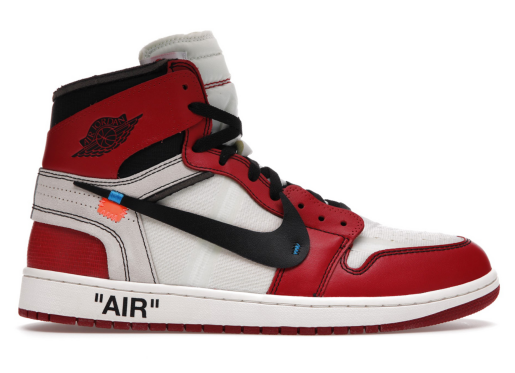

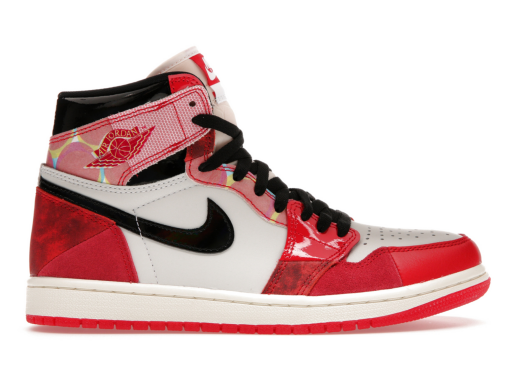

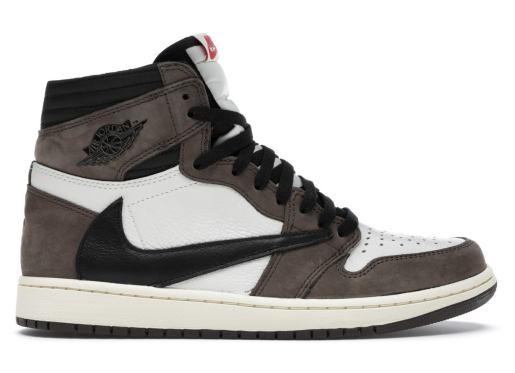

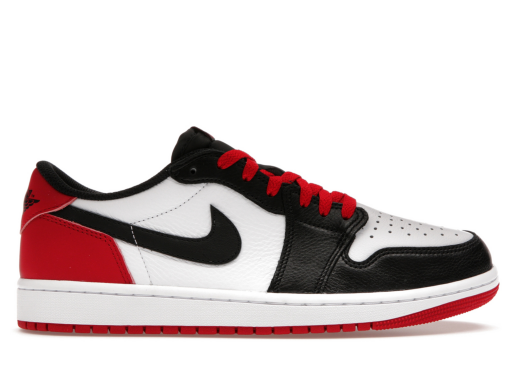

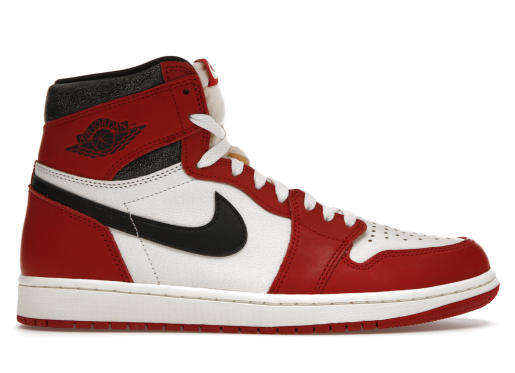

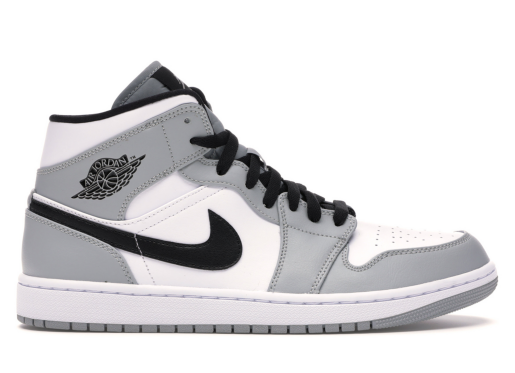

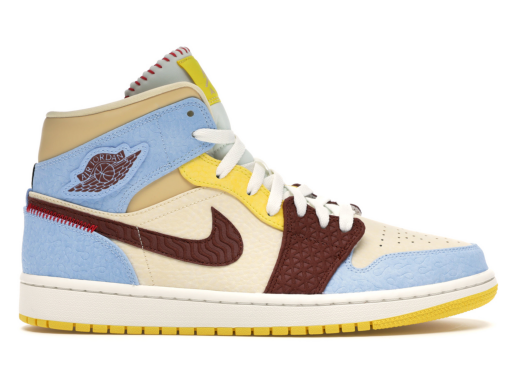

In [17]:
for shoe in shoes :
    # Get the image from the URL
    response = requests.get(shoe['image'])
    img = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

In [36]:
i = 3
for j in range(len(sizes)):
    browse.setSearch(searches[i], 1 , gender = "", years = [''], sortID = "deadstock_sold", shoeSize = [sizes[j]])
    browse.setResponse()
    resp = browse.getResponse()['data']['browse']['results']['edges'][0]['node']

    sold = resp['market']['deadStock']['sold']
    id = resp['id']

    print(resp['product']['title'], "for size : " + sizes[j] + ", sold : " + str(sold))

    intervals = sold
    releaseDate = shoes[i]['release Date']

    """ get the data (time series) from the query as a panda dataframe"""
    sales = FetchSalesGraphQueryHandling(id, isVariant = True)
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")

    path = './SALES/' + shoes[i]['URL Key']
    if not os.path.exists(path):
        os.mkdir(path)
    data.to_csv('./SALES/' + shoes[i]['URL Key'] + '/size_' + sizes[j] + '.csv')

Jordan 1 Retro Low OG Black Toe (2023) for size : 8, sold : 738
Number of points fetched : 738
Jordan 1 Retro Low OG Black Toe (2023) for size : 8.5, sold : 772
Number of points fetched : 772
Jordan 1 Retro Low OG Black Toe (2023) for size : 9, sold : 1013
Number of points fetched : 1014
Jordan 1 Retro Low OG Black Toe (2023) for size : 9.5, sold : 1185
Number of points fetched : 1185
Jordan 1 Retro Low OG Black Toe (2023) for size : 10, sold : 1302
Number of points fetched : 1302
Jordan 1 Retro Low OG Black Toe (2023) for size : 10.5, sold : 1323
Number of points fetched : 1323
Jordan 1 Retro Low OG Black Toe (2023) for size : 11, sold : 1252
Number of points fetched : 1251
